In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
%matplotlib inline
import pylab
import scipy.interpolate as sp

In [6]:
text_file1 = np.loadtxt('hoverrNoCommas.txt', dtype = 'float')
print text_file1 # Prints the text file as a 2d array.
print text_file1.shape

[[ 0.4076886  -0.63140897]
 [ 0.54223664 -0.66783315]
 [ 0.64981802 -0.7223981 ]
 [ 0.74841391 -0.78149655]
 [ 0.87389496 -0.85877652]
 [ 1.02620004 -0.98147974]
 [ 1.16955019 -1.09509559]
 [ 1.2949803  -1.195077  ]
 [ 1.38454995 -1.27687009]
 [ 1.48312546 -1.34504911]
 [ 1.55480563 -1.39958689]
 [ 1.65344227 -1.44052419]
 [ 1.73422    -1.44058531]
 [ 1.82400359 -1.42703237]
 [ 1.90483225 -1.40439206]
 [ 1.97661429 -1.41352697]
 [ 2.0573207  -1.4453701 ]
 [ 2.14691073 -1.51808262]
 [ 2.20959522 -1.58169419]
 [ 2.29013863 -1.68618192]
 [ 2.39754682 -1.81793176]
 [ 2.48705534 -1.92696657]
 [ 2.56768025 -1.99513201]
 [ 2.63041568 -2.03604214]
 [ 2.72904213 -2.08151972]
 [ 2.80976383 -2.10655243]
 [ 2.89948119 -2.12251135]
 [ 2.9623185  -2.11801861]
 [ 3.0611538  -2.0704203 ]
 [ 3.18694557 -2.0092215 ]
 [ 3.51940871 -1.84148216]
 [ 4.02259616 -1.58760641]
 [ 4.5527299  -1.32467045]
 [ 5.00200442 -1.09799567]
 [ 5.3883754  -0.9053255 ]
 [ 6.0622617  -0.57666404]
 [ 6.60139112 -0.3046543 ]
 

# h vs. a

In [7]:
a = text_file1[:,0]
ratio = text_file1[:,1]
ratio1 = 10**ratio
a1 = 10**a
height = (ratio1*a1)*2
a1_in_rg = a1*2

h_=np.zeros((38,2))
h_[:,0]= a1_in_rg
h_[:,1] = height


# h/a vs. a

TypeError: 'tuple' object is not callable

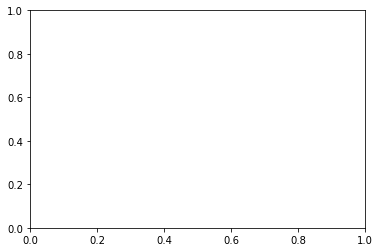

In [8]:
logPlot = plt.gca()
plt.plot = (a,ratio)
a = text_file1[:,0]
ratio = text_file1[:,1]
plt.plot(a1,ratio1) # Sets each column as the x and y coordinates, and creates and shows a plot.
plt.xlabel('log a [Rs]',fontsize=20)
plt.ylabel('log h/a',fontsize=18)
plt.savefig('hovera1.png', dpi=300, bbox_inches='tight')

# h vs a adjusted

NameError: name 'distance_in_rg' is not defined

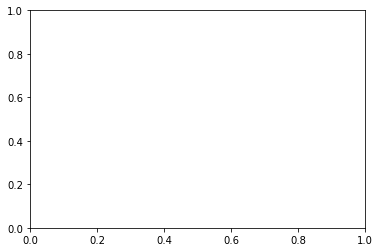

In [9]:
logPlot = plt.gca()
logPlot.loglog(distance_in_rg,height)
plt.xlabel('a [Rg]',fontsize=18)
plt.ylabel('height [Rg]',fontsize=18)
#plt.plot([2.55675200e+00,  4.50238131e+01], [ 5.97419825e-01,1.63274396e+00], c='r')
#plt.plot([4.50238131e+01,1.14109211e+02], [1.63274396e+00,4.09214110e+00], c='y')
#plt.plot([1.14109211e+02,3.69555994e+02], [4.09214110e+00, 3.73721635e+00 ], c='g')
#plt.plot([3.69555994e+02,9.16892670e+02],[4.09214110e+00,6.98714721e+00], color='orange')
#plt.plot([9.16892670e+02,8.32494014e+06],[6.98714721e+00, 6.01085228e+06], c='b' )
plt.savefig('hovera.png', dpi=300, bbox_inches='tight')

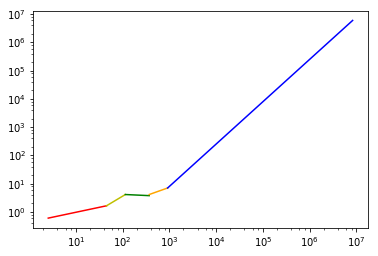

In [10]:
logPlot = plt.gca()
logPlot.loglog([2.55675200e+00,  4.50238131e+01], [ 5.97419825e-01,1.63274396e+00], c='r')
logPlot.loglog([4.50238131e+01,1.14109211e+02], [1.63274396e+00,4.09214110e+00], c='y')
logPlot.loglog([1.14109211e+02,3.69555994e+02], [4.09214110e+00, 3.73721635e+00 ], c='g')
logPlot.loglog([3.69555994e+02,9.16892670e+02],[4.09214110e+00,6.98714721e+00], color='orange')
logPlot.loglog([9.16892670e+02,8.32494014e+06],[6.98714721e+00, 6.01085228e+06], c='b')

# Surf.density vs a

In [11]:
text_file2 = np.loadtxt('SurfaceDensity.txt', dtype = 'float')
a2 = text_file2[:,0]
surface_density = text_file2[:,1]

In [12]:
unlog_sd = 10**text_file2[:,1]
unlog_a2 = (10**a2)*2

In [13]:
print unlog_a2

[  5.19331195e+00   7.54408499e+00   1.32083879e+01   3.02837865e+01
   6.00492342e+01   7.54408499e+01   9.09259094e+01   1.14231730e+02
   1.32083879e+02   1.52725965e+02   1.87932966e+02   2.36103306e+02
   2.90530785e+02   3.50165406e+02   4.22040686e+02   5.30216720e+02
   6.80082387e+02   9.09259094e+02   1.11886514e+03   1.45007464e+03
   1.84074640e+03   2.96620503e+03   7.23749962e+03   2.26508263e+04
   7.70221400e+04   2.46104801e+05   6.39049501e+05   2.31256026e+06
   6.39049501e+06   1.72968466e+07]


In [14]:
def m(x1,x2,y1,y2):
    slope=(y2-y1)/(x2-x1)
    return slope
def b(x1,x2,y1,y2):
    yint=y1-(m(x1,x2,y1,y2)*x1)
    return yint

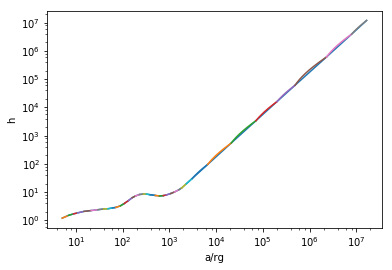

In [15]:
logPlot=plt.gca()
logPlot.loglog(a1_in_rg,height)
logPlot.set_xlabel('a/rg') 
logPlot.set_ylabel('h')
for i in range(len(h_)-1):
    j=i+1
    rad = np.arange(h_[i,0],h_[j,0],h_[j,0]/h_[i,0])
    h_p= (m(h_[i,0],h_[j,0],h_[i,1],h_[j,1])*rad)+b(h_[i,0],h_[j,0],h_[i,1],h_[j,1])

    logPlot=plt.gca()
    logPlot.loglog(rad,h_p)
    

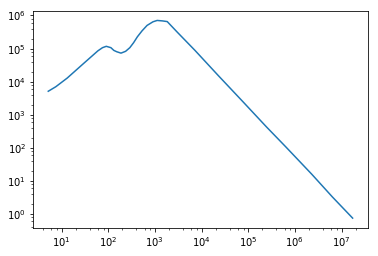

In [16]:
logPlot=plt.gca()
logPlot.loglog(unlog_a2,unlog_sd)

# This is velocity vs. distance

In [17]:
c = 6.67e-11*2*1.99e30*10**8
#d = text_file1[:,0]
#distance2= 10**d

distance_in_meters = a1*(2*c)
speed_of_light_squared=(3e8)**2
distance = (distance_in_meters/speed_of_light_squared)

distance_in_rg = distance/(1.5*10**11)
velocity = (c/distance)**(1/2.0)*10**(-3)
print velocity

[  1.32666709e+05   1.13628673e+05   1.00391570e+05   8.96188363e+04
   7.75637462e+04   6.50887959e+04   5.51862853e+04   4.77656956e+04
   4.30855144e+04   3.84630328e+04   3.54163206e+04   3.16144128e+04
   2.88068823e+04   2.59779253e+04   2.36695572e+04   2.17921013e+04
   1.98584755e+04   1.79122810e+04   1.66651277e+04   1.51892714e+04
   1.34224825e+04   1.21081721e+04   1.10348423e+04   1.02659328e+04
   9.16400231e+03   8.35072812e+03   7.53122564e+03   7.00562693e+03
   6.25214954e+03   5.40920539e+03   3.68894264e+03   2.06684627e+03
   1.12264205e+03   6.69274146e+02   4.28961737e+02   1.97458305e+02
   1.06147726e+02   7.35217265e+01]


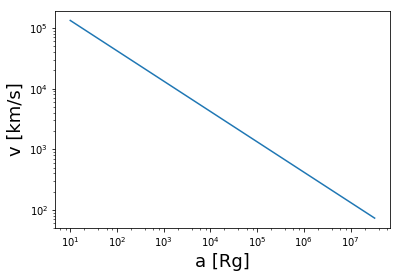

In [18]:
logPlot=plt.gca()
logPlot.loglog(distance_in_rg,velocity)
plt.xlabel('a [Rg]',fontsize=18)
plt.ylabel('v [km/s]',fontsize=18)
plt.savefig('velocity.png', dpi=300, bbox_inches='tight')

# T Orbit vs. Distance

In [19]:
pi = 3.14
T_Orb = (2*np.pi*distance_in_rg*1.5*10**8)/velocity

[  7.14336614e+04   1.13690707e+05   1.64853070e+05   2.31734595e+05
   3.57447648e+05   6.04881166e+05   9.92419501e+05   1.53052509e+06
   2.08542669e+06   2.93128603e+06   3.75472775e+06   5.27877819e+06
   6.97750247e+06   9.51426805e+06   1.25781965e+07   1.61172686e+07
   2.12986001e+07   2.90225853e+07   3.60381786e+07   4.75968209e+07
   6.89747653e+07   9.39621653e+07   1.24133894e+08   1.54167747e+08
   2.16737073e+08   2.86428179e+08   3.90473708e+08   4.85118409e+08
   6.82496933e+08   1.05387320e+09   3.32263831e+09   1.88914047e+10
   1.17886713e+11   5.56386557e+11   2.11316354e+12   2.16651929e+13
   1.39462256e+14   4.19702622e+14]


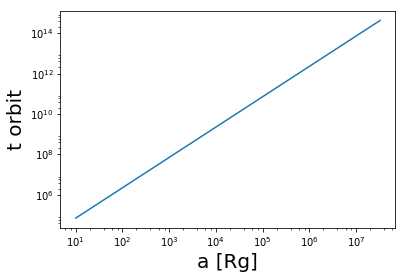

In [20]:
logPlot=plt.gca()
logPlot.loglog(distance_in_rg,T_Orb)
plt.xlabel('a [Rg]',fontsize=20)
plt.ylabel('t orbit',fontsize=20)

print T_Orb

# Time in disk vs Distance

In [21]:
t_in_disk = (ratio1*T_Orb)/2*np.pi

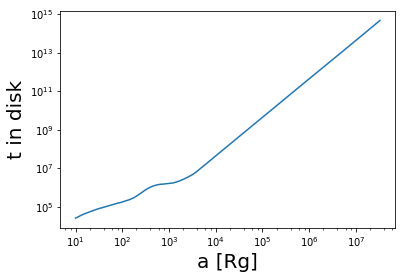

In [22]:
logPlot=plt.gca()
logPlot.loglog(distance_in_rg,t_in_disk)
plt.xlabel('a [Rg]',fontsize=20)
plt.ylabel('t in disk',fontsize=20)

In [23]:
t_over_T = t_in_disk/T_Orb
print t_over_T

[ 0.36703789  0.33751006  0.29766089  0.25979054  0.21744196  0.16392309
  0.12618981  0.10024042  0.08303282  0.07096934  0.06259404  0.05696337
  0.05695536  0.05876077  0.0619053   0.06061679  0.0563313   0.04764719
  0.04115529  0.03235474  0.02388846  0.0185846   0.01588502  0.01445699
  0.01301968  0.01229044  0.011847    0.0119702   0.01335671  0.01537795
  0.02262756  0.04059883  0.07437884  0.12534996  0.19534144  0.41634738
  0.77887107  1.13416127]


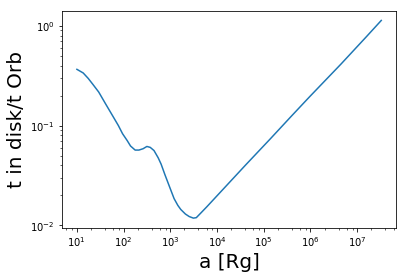

In [24]:
logPlot=plt.gca()
logPlot.loglog(distance_in_rg,t_over_T)
plt.xlabel('a [Rg]',fontsize=20)
plt.ylabel('t in disk/t Orb',fontsize=20)

In [25]:
def slope(dx, dy):
    return (dy / dx) if dx else None

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __str__(self):
        return '({}, {})'.format(self.x, self.y)

    def __repr__(self):
        return 'Point({}, {})'.format(self.x, self.y)

    def halfway(self, target):
        midx = (self.x + target.x) / 2
        midy = (self.y + target.y) / 2
        return Point(midx, midy)

    def distance(self, target):
        dx = target.x - self.x
        dy = target.y - self.y
        return (dx*dx + dy*dy) ** 0.5

    def reflect_x(self):
        return Point(-self.x,self.y)

    def reflect_y(self):
        return Point(self.x,-self.y)

    def reflect_x_y(self):
        return Point(-self.x, -self.y)

    def slope_from_origin(self):
        return slope(self.x, self.y)

    def slope(self, target):
        return slope(target.x - self.x, target.y - self.y)

    def y_int(self, target):       # <= here's the magic
        return self.y - self.slope(target)*self.x

    def line_equation(self, target):
        slope = self.slope(target)

        y_int = self.y_int(target)
        if y_int < 0:
            y_int = -y_int
            sign = '-'
        else:
            sign = '+'

        return '{}x {} {}'.format(slope, sign, y_int)

    def line_function(self, target):
        slope = self.slope(target)
        y_int = self.y_int(target)
        def fn(x):
            return slope*x + y_int
        return fn

In [26]:
d_rg = np.array(distance_in_rg)
d_rg1 = d_rg[:36]

h_=np.zeros((38,2))
h_[:,0]=d_rg
h_[:,1]=height

def hint(a):
    for i in range(len(d_rg)-1):
        j=i+1
        c = Point(d_rg[i],height[i])
        d = Point(d_rg[j],height[j])
        c_36 = Point(d_rg[36],height[36])
        d_37 = Point(d_rg[37],height[37])
        if ((a>=d_rg[i]) and (a<d_rg[j])):
            return (slope(d_rg[j]-d_rg[i],height[j]-height[i])*a)+(Point.y_int(c,d))
        elif ((a==d_rg[37])):
            return height[37]
        elif ((a>d_rg[37]) and (a<=unlog_a2[29])):
            return (slope(harg[37]-d_rg[36],height[37]-height[36])*a)+(Point.y_int(c_36,d_37))
    else:
        return a*0

In [27]:
sden_=np.zeros((30,2))
sden_[:,0]=unlog_a2
sden_[:,1]=unlog_sd

def S_int(a):    
    for i in range(len(unlog_a2)-1):
        j=i+1
        c = Point(unlog_a2[i],unlog_sd[i])
        d = Point(unlog_a2[j],unlog_sd[j])
        c_0 = Point(unlog_a2[0],unlog_sd[0])
        d_1 = Point(unlog_a2[1],unlog_sd[1])
        if ((a>=d_rg[0]) and (a<unlog_a2[0])):
            return (slope(unlog_a2[1]-unlog_a2[0],unlog_sd[1]-unlog_sd[0])*a)+(Point.y_int(c_0,d_1))
        elif ((a>=unlog_a2[i]) and (a<unlog_a2[j])):
            return (slope(unlog_a2[j]-unlog_a2[i],unlog_sd[j]-unlog_sd[i])*a)+(Point.y_int(c,d))
        elif ((a==unlog_a2[29])):
            return unlog_sd[29]
    else:
        return a*0

In [28]:
denint1=[]
for i in range(len(d_rg)):
    denint1.append(S_int(d_rg[i]))

In [29]:
#creating a list of values for interpolated thickness hint
h_int1=[]
for i in range(len(d_rg1)):
    h_int1.append(hint(d_rg[i]))

In [30]:
def Density(a):
    Dcal=S_int(a)/(hint(a)*1.5e+11/100)
    return Dcal
den1=[]
for i in range(len(d_rg1)):
    den1.append(Density(d_rg[i]))

In [31]:
mass = 1.99e+30
Force = 0.5*6.088e+18/mass

In [32]:
def i_crit(distance_in_rg,height):
    icrit = np.arcsin(height/(2*distance_in_rg))
    return icrit

def Speed(d_rg1):
    speed = (c/(d_rg1*1.5e+11))**(1/2.0)*10**(-3)
    return speed         


def vRely(d_rg1,i_):
    y = (Speed(d_rg1)*np.sin(i_))**2
    return y

def Torb(d_rg):
    orbit = (2*np.pi*d_rg*1.5*10**11)/Speed(d_rg)
    return orbit

def Density(d_rg):
    sigma = (SurfaceDensity(d_rg)/(Height(d_rg)*1.5e+11))*10**(3)
    return sigma

def dvy(distance_in_rg,height):
    dVy = Force*Density(distance_in_rg)*Torb(distance_in_rg)*vRely(distance_in_rg, i_crit)
    return dvy

In [33]:
i_ = np.pi/4,np.pi/3,np.pi/6,np.pi/2
i_2 = np.array([np.pi/6,np.pi/3,np.pi/4,np.pi/2])
#for j in h_a1:
    #for k in T_orb:
        #print TinD(j,i,k)

In [34]:
 
vRel = np.array([8.80022778e+09,6.45573767e+09,5.03923364e+09,4.01576791e+09,3.00806736e+09,2.11827567e+09,1.52276304e+09,1.14078084e+09,9.28180776e+08,7.39702446e+08,6.27157883e+08,4.99735550e+08,4.14918235e+08,3.37426302e+08,2.80123968e+08,2.37447841e+08,1.97179524e+08,1.60424905e+08,1.38863241e+08,1.15356983e+08,9.00815187e+07,7.33039161e+07,6.08838724e+07,5.26946880e+07,4.19894692e+07,   3.48673301e+07,   2.83596798e+07,2.45394044e+07,1.95446869e+07,1.46297515e+07,6.80414889e+06,2.13592674e+06,6.30162587e+05,2.23963941e+05,9.20040858e+04,1.94948911e+04])

In [50]:
from numpy import cos,sin,arcsin
G = 6.67e-11*2*1.99e30
h_a1 = np.array(ratio1)
h_a2 = h_a1[:36]
T_orb = np.array(T_Orb*10)
T_Orb1 = T_Orb[:36]
d_rg = np.array(distance_in_rg)
d_km = d_rg1*1.5e+08
r_sun = 6.96e+05
r_mstar = r_sun*0.4
r_redg = r_sun*100
r_Ostar = r_sun*15
Rho = np.array([5.3226935186600863e-06, 5.9765213777357602e-06, 7.3723339743839646e-06, 8.9401791325524744e-06, 1.1261482733997499e-05, 1.6537256918830009e-05, 2.2958058745336347e-05, 2.8447457382521977e-05, 2.9789327173609211e-05, 2.4360195526836645e-05, 1.9631323393403089e-05, 1.5258155544719618e-05, 1.3164486515251008e-05, 1.2516041752612994e-05, 1.3132150172415993e-05, 1.5853404839341584e-05, 2.0749437020210494e-05, 2.8503995674408276e-05, 3.5631581153442283e-05, 4.5908329827371274e-05, 5.8324157677768756e-05, 6.4289903174157269e-05, 6.1009785104746573e-05, 5.6465307937633348e-05, 4.3071360566015997e-05, 2.9500064694192425e-05, 1.7382078903172469e-05, 1.3622937589455536e-05, 8.0137896736367608e-06, 3.3750627357713892e-06, 4.2420449746897986e-07, 1.3387213182609257e-08, 3.3489405588841745e-10, 1.2663886985936325e-11, 9.7054086404354802e-13, 9.6583820155355247e-15])
Density_Ratio = np.array(Rho/1410)
Density_mstar = np.array(Rho/8806)
Density_Ostar = np.array(Rho/27.833)
Density_RG = np.array(Rho/2.81)
Rbondi = np.array((G*10)/((vRel+100)*1000))/1000
Dbondi = np.array(mass*10/(4/3*np.pi*(Rbondi*1000)**3))
Density_sBH = np.array((Rho/Dbondi)*1000)

G = 6.67e-11*2*1.99e30                         
def TinD(h_a2,i_):
    t_in_d = np.arcsin(h_a2*1/(2*sin(i_))/np.pi)
    return t_in_d

In [51]:
def inv_n(Density_Ratio,d_km,h_a2,i_):
    n_orb = (3*np.pi/4)*(Density_Ratio)*(d_km/r_sun)*sin(i_)*TinD(h_a2,i_)
    return n_orb
def inv_n1(Density_mstar,d_km,h_a2,i_):
    n_orb1 = (3*np.pi/4)*(Density_mstar)*(d_km/r_mstar)*sin(i_)*TinD(h_a2,i_)
    return n_orb1
def inv_n2(Density_Ostar,d_km,h_a2,i_):
    n_orb2 = (3*np.pi/4)*(Density_Ostar)*(d_km/r_Ostar)*sin(i_)*TinD(h_a2,i_)
    return n_orb2
def inv_n3(Density_RG,d_km,h_a2,i_):
    n_orb3 = (3*np.pi/4)*(Density_RG)*(d_km/r_redg)*sin(i_)*TinD(h_a2,i_)
    return n_orb3
def inv_nB(Density_sBH,d_km,Rbondi,h_a2,i_):
    n_orbB = (3*np.pi/4)*(Density_sBH)*(d_km/Rbondi)*sin(i_)*TinD(h_a2,i_)
    return n_orbB

In [52]:
def TgrindPi(Density_Ratio,d_km,h_a2,i_,T_Orb1):
    Tg = inv_n(Density_Ratio,d_km,h_a2,i_)**(-1)*T_Orb1/3.154e+7
    return Tg
def Tgrindm(Density_mstar,d_km,h_a2,i_,T_Orb1):
    Tgm = inv_n1(Density_mstar,d_km,h_a2,i_)**(-1)*T_Orb1/3.154e+7
    return Tgm
def TgrindO(Density_Ostar,d_km,h_a2,i_,T_Orb1):
    TgO = inv_n2(Density_Ostar,d_km,h_a2,i_)**(-1)*T_Orb1/3.154e+7
    return TgO
def TgrindRG(Density_RG,d_km,h_a2,i_,T_Orb1):
    TgRG = inv_n3(Density_RG,d_km,h_a2,i_)**(-1)*T_Orb1/3.154e+7
    return TgRG
def TgrindsBH(Density_sBH,d_km,Rbondi,h_a2,i_,T_Orb1):
    Tgs = inv_nB(Density_sBH,d_km,Rbondi,h_a2,i_)**(-1)*T_Orb1/3.154e+7
    return Tgs 

In [53]:
TGrindPi4 = np.array([3.15813297e+03,3.57143347e+03,3.71603122e+03,3.93338028e+03,4.31089194e+03,4.64071980e+03,5.12177931e+03,6.01198328e+03,7.68392520e+03,1.23149483e+04,1.88166937e+04,2.98021414e+04,3.79136480e+04,4.28618620e+04,4.25574554e+04,3.91034530e+04,3.52799880e+04,3.36618417e+04,3.35091330e+04,3.62967044e+04,4.37889822e+04,5.66056741e+04,7.65739892e+04,9.77185413e+04,1.59353260e+05,2.70470657e+05,5.28030528e+05,7.16829526e+05,1.22368039e+06,2.91689700e+06,2.31270105e+07,7.28988821e+08,2.92838888e+10,7.70755271e+11,1.00681959e+13,1.03072206e+15])   

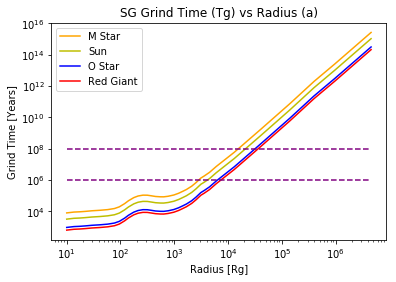

In [54]:
TenSix=[]
for j in range(len(d_rg1)):
    TenSix.append(10**6)
TenEight=[]
for j in range(len(d_rg1)):
    TenEight.append(10**8)

logPlot = plt.gca()
logPlot.loglog(d_rg1,Tgrindm(Density_mstar,d_km,h_a2,np.pi/4,T_Orb1), c= 'orange', label='M Star')
logPlot.loglog(d_rg1,TgrindPi(Density_Ratio,d_km,h_a2,np.pi/4,T_Orb1),c ='y',label = 'Sun')
logPlot.loglog(d_rg1,TgrindO(Density_Ostar,d_km,h_a2,np.pi/4,T_Orb1), c= 'b', label='O Star')
logPlot.loglog(d_rg1,TgrindRG(Density_RG,d_km,h_a2,np.pi/4,T_Orb1), c='r', label = 'Red Giant')
logPlot.loglog(d_rg1,TenSix,'r--',c='purple')
logPlot.loglog(d_rg1,TenEight,'r--',c='purple')
plt.title('SG Grind Time (Tg) vs Radius (a)')
plt.legend()
plt.xlabel('Radius [Rg]')
plt.ylabel('Grind Time [Years]')
ax = plt.subplot(111)
plt.savefig('Final.pdf', dpi=300, bbox_inches='tight')

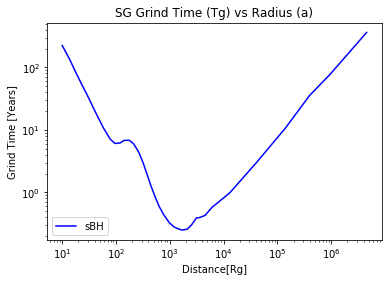

In [62]:
logPlot = plt.gca()
logPlot.loglog(d_rg1,TgrindsBH(Density_sBH,d_km,Rbondi,h_a2,np.pi/4,T_Orb1),c ='b',label = 'sBH')
plt.legend()
plt.xlabel('Distance[Rg]')
plt.ylabel('Grind Time [Years]')
ax = plt.subplot(111)
plt.savefig('sBH.pdf', dpi=300, bbox_inches='tight')
plt.title('SG Grind Time (Tg) vs Radius (a)')

In [55]:
print Rbondi #in Km

[  3.01658098e+05   4.11209391e+05   5.26798346e+05   6.61059103e+05
   8.82513453e+05   1.25321737e+06   1.74331774e+06   2.32705501e+06
   2.86006755e+06   3.58882096e+06   4.23284096e+06   5.31212852e+06
   6.39803011e+06   7.86737488e+06   9.47672943e+06   1.11799664e+07
   1.34631558e+07   1.65476697e+07   1.91170685e+07   2.30125444e+07
   2.94694971e+07   3.62143869e+07   4.36019513e+07   5.03780374e+07
   6.32218918e+07   7.61358090e+07   9.36065096e+07   1.08179039e+08
   1.35824454e+08   1.81455020e+08   3.90147398e+08   1.24280279e+09
   4.21199045e+09   1.18477788e+10   2.88223913e+10   1.35477150e+11]


In [56]:
print (vRel)**(0.5)

[ 93809.52926009  80347.60525367  70987.55975521  63370.0868707
  54845.85089138  46024.72889654  39022.59653073  33775.44729534
  30466.05941043  27197.47131628  25043.1204725   22354.76571114
  20369.54184561  18369.16715586  16736.90437327  15409.34265308
  14042.062669    12665.89534932  11784.02482177  10740.43681607
   9491.12842079   8561.77061711   7802.81182651   7259.11068933
   6479.92817861   5904.85648428   5325.38071878   4953.7263146
   4420.93733274   3824.88581529   2608.47635412   1461.48100911
    793.8278069     473.24828684    303.32175293    139.62410644]


In [57]:
print d_rg1

[  1.00552700e+01   1.37069799e+01   1.75599452e+01   2.20353040e+01
   2.94171160e+01   4.17739144e+01   5.81105952e+01   7.75685071e+01
   9.53355951e+01   1.19627381e+02   1.41094721e+02   1.77070986e+02
   2.13267722e+02   2.62245907e+02   3.15891093e+02   3.72665704e+02
   4.48772088e+02   5.51589336e+02   6.37236074e+02   7.67085479e+02
   9.82317660e+02   1.20714788e+03   1.45340076e+03   1.67927110e+03
   2.10740141e+03   2.53786758e+03   3.12022799e+03   3.60598266e+03
   4.52750494e+03   6.04854204e+03   1.30051044e+04   4.14286993e+04
   1.40421962e+05   3.95102292e+05   9.61790620e+05   4.53906956e+06]


In [63]:
print Rbondi

[  3.01658098e+05   4.11209391e+05   5.26798346e+05   6.61059103e+05
   8.82513453e+05   1.25321737e+06   1.74331774e+06   2.32705501e+06
   2.86006755e+06   3.58882096e+06   4.23284096e+06   5.31212852e+06
   6.39803011e+06   7.86737488e+06   9.47672943e+06   1.11799664e+07
   1.34631558e+07   1.65476697e+07   1.91170685e+07   2.30125444e+07
   2.94694971e+07   3.62143869e+07   4.36019513e+07   5.03780374e+07
   6.32218918e+07   7.61358090e+07   9.36065096e+07   1.08179039e+08
   1.35824454e+08   1.81455020e+08   3.90147398e+08   1.24280279e+09
   4.21199045e+09   1.18477788e+10   2.88223913e+10   1.35477150e+11]
